In [ ]:
import netCDF4 as nc
import numpy as np
from scipy.interpolate import interp1d

z_r = np.load('/home/z5297792/MRes/z_r.npy')
z_r = np.transpose(z_r, (1, 2, 0))
temp = np.load('/srv/scratch/z5297792/Climatology/temp_ave.npy')
depths = z_r[150,150,:]

temp = np.repeat(temp[:, :, :, np.newaxis], 30, axis=3)

def depth_interpolator(M,z_r,depths):

    # Dimensions of M and z_r
    dim_i, dim_j, dim_sigma, dim_time = M.shape
    assert z_r.shape == (dim_i, dim_j, dim_sigma)

    # Initialize interpolated matrix
    M_interpolated = np.zeros((dim_i, dim_j, len(depths), dim_time))

    # Interpolate for each day (time dimension)
    for t in range(dim_time):
        for i in range(dim_i):
            for j in range(dim_j):
                # Get depth levels from z_r
                depth_levels = z_r[i, j, :]
                
                # Get values of M at each depth level for current time t
                values = M[i, j, :, t]
                
                # Perform interpolation
                if np.all(np.isnan(values)):
                    # Handle case where all values are NaN (e.g., outside valid data range)
                    interpolated_values = np.full(len(depths), np.nan)
                else:
                    # Use linear interpolation
                    interpolator = interp1d(depth_levels, values, kind='linear', bounds_error=False, fill_value=np.nan)
                    interpolated_values = interpolator(depths)
                
                # Assign interpolated values to M_interpolated for current time t
                M_interpolated[i, j, :, t] = interpolated_values
        M_interpolated[:,:, 0, t] = M[:,:,0,t]

    return M_interpolated

temp = depth_interpolator(temp, z_r, depths)

temp = temp[:,:,:,0]

np.save('/srv/scratch/z5297792/Climatology/temp_ave_interpolated.npy', temp)

del temp

/home/z5297792/.local/lib/python3.10/site-packages/scipy/interpolate/_interpolate.py:479: RuntimeWarning: invalid value encountered in subtract
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
temp = np.load('/srv/scratch/z5297792/Climatology/temp_ave_interpolated.npy')

plt.pcolor(temp[:,:,-2])
plt.colorbar()

/scratch/pbs.5621516.kman.restech.unsw.edu.au/ipykernel_1013521/3181965000.py:4: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar()


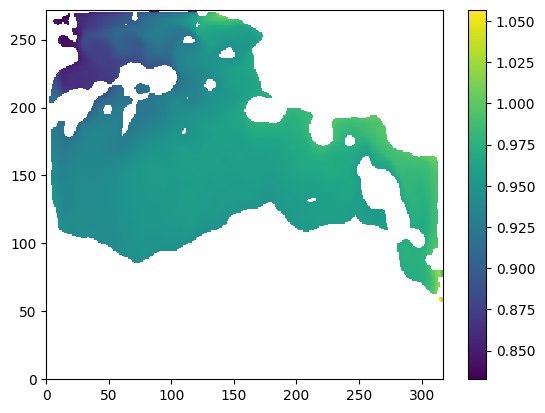